<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction ID   1000 non-null   object 
 1   Timestamp        1000 non-null   object 
 2   Sender Name      1000 non-null   object 
 3   Sender UPI ID    1000 non-null   object 
 4   Receiver Name    1000 non-null   object 
 5   Receiver UPI ID  1000 non-null   object 
 6   Amount (INR)     1000 non-null   float64
 7   Status           1000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 62.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   transaction_id   1000 non-null   object        
 1   timestamp        1000 non-null   datetime64[ns]
 2   sender_name      1000 non-null   object        
 3   sender_

C:\Users\HP\AppData\Local\Temp\ipykernel_13876\212922050.py:17: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


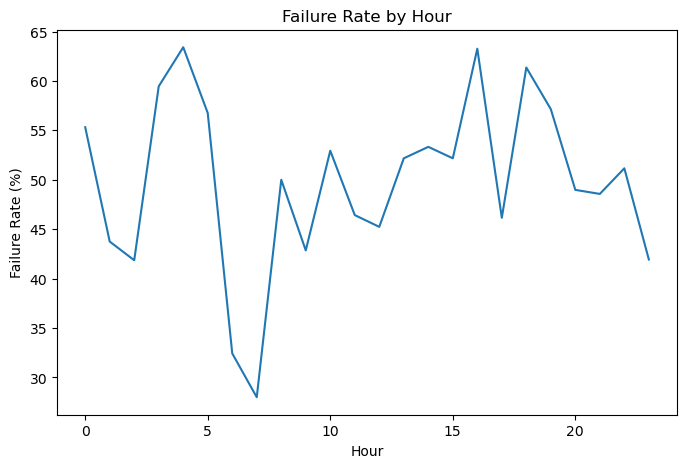

C:\Users\HP\AppData\Local\Temp\ipykernel_13876\212922050.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amount_failure = df.groupby('amount_category')['failure_flag'].mean() * 100


amount_category
Low          53.535354
Medium       48.300971
High         50.306748
Very High          NaN
Name: failure_flag, dtype: float64


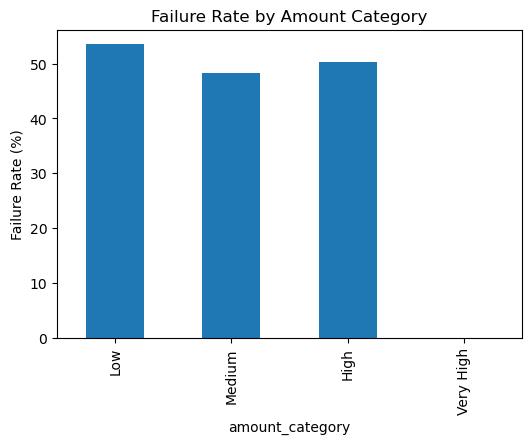

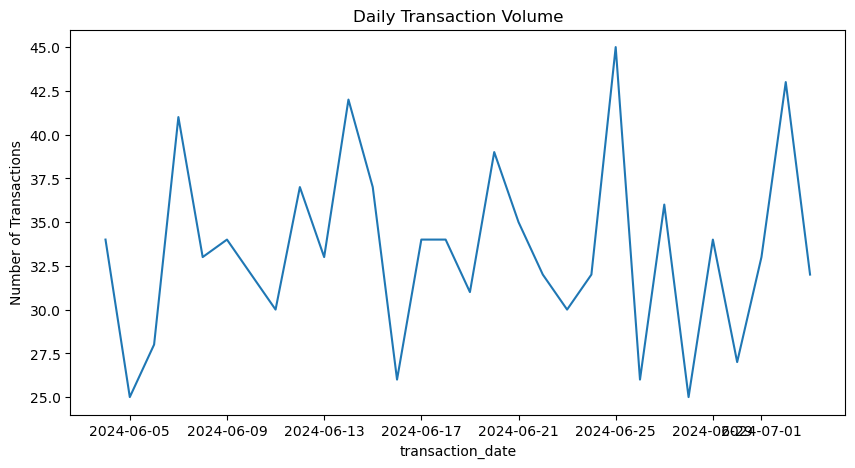

                  total_transactions  total_failures  failure_rate_%
sender_name                                                         
Manikya Bajaj                      1               1           100.0
Jhanvi Keer                        1               1           100.0
Kaira Sur                          1               1           100.0
Kaira Tak                          1               1           100.0
Kanav Gole                         1               1           100.0
...                              ...             ...             ...
Kimaya Dugar                       1               0             0.0
Kismat Bhagat                      1               0             0.0
Kismat Bora                        1               0             0.0
Kismat Deshpande                   1               0             0.0
Zoya Sur                           1               0             0.0

[997 rows x 3 columns]


In [77]:
import pandas as pd
import numpy as np
df = pd.read_csv("transaction.csv")
df.shape
df.info()
df.isnull().sum()
# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Replace spaces with underscore
df.columns = df.columns.str.replace(" ", "_")

# Remove special characters like ()
df.columns = df.columns.str.replace("(", "")
df.columns = df.columns.str.replace(")", "")

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# about the information column data type
df.info()
# there we create the column ( we have a timestamp where mixed date and time) transcation_date and transaction_time
df['transaction_date'] = df['timestamp'].dt.date
df['transaction_time'] = df['timestamp'].dt.time

# create hour column for analytics when user make the transaction
df['hour'] = df['timestamp'].dt.hour

# there we create a array for store the success rate and failure rate
df['status'].unique()
df['failure_flag'] = df['status'].apply(lambda x: 1 if x == 'FAILED' else 0)
df[['status', 'failure_flag']].head()

# total transcation count
total_transactions = len(df)
print("Total Transactions:", total_transactions)

# total failure count
total_failures = df['failure_flag'].sum()
print("Total Failures:", total_failures)

# failure rate
failure_rate = (total_failures / total_transactions) * 100
print("Failure Rate (%):", round(failure_rate, 2))

# hour wise failure rate
hourly_failure = df.groupby('hour')['failure_flag'].mean() * 100
print(hourly_failure)

# hour wise failure analysics visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
hourly_failure.plot(kind='line')
plt.title("Failure Rate by Hour")
plt.xlabel("Hour")
plt.ylabel("Failure Rate (%)")
plt.show()

# amount failure analysics visualization
df['amount_category'] = pd.cut(
    df['amount_inr'],
    bins=[0, 1000, 5000, 20000, 100000],
    labels=['Low', 'Medium', 'High', 'Very High']
)

amount_failure = df.groupby('amount_category')['failure_flag'].mean() * 100

print(amount_failure)
plt.figure(figsize=(6,4))
amount_failure.plot(kind='bar')
plt.title("Failure Rate by Amount Category")
plt.ylabel("Failure Rate (%)")
plt.show()

# which day have more transcation
daily_transactions = df.groupby('transaction_date').size()
plt.figure(figsize=(10,5))
daily_transactions.plot()
plt.title("Daily Transaction Volume")
plt.ylabel("Number of Transactions")
plt.show()

# for unknown user identify the new user transcation have failure or not
sender_failure = (
    df.groupby('sender_name')
    .agg(
        total_transactions=('failure_flag', 'count'),
        total_failures=('failure_flag', 'sum')
    )
)

sender_failure['failure_rate_%'] = (
    sender_failure['total_failures'] / sender_failure['total_transactions']
) * 100

# Sort by highest failure rate
sender_failure = sender_failure.sort_values(by='failure_rate_%', ascending=False)

print(sender_failure)

In [81]:
receiver_failure = (
    df.groupby('receiver_name')
    .agg(
        total_transactions=('failure_flag', 'count'),
        total_failures=('failure_flag', 'sum')
    )
)

receiver_failure['failure_rate_%'] = (
    receiver_failure['total_failures'] / receiver_failure['total_transactions']
) * 100

receiver_failure = receiver_failure.sort_values(by='failure_rate_%', ascending=False)

print(receiver_failure.head(50))


                    total_transactions  total_failures  failure_rate_%
receiver_name                                                         
Lavanya Dayal                        1               1           100.0
Mishti Kala                          1               1           100.0
Mohanlal Golla                       1               1           100.0
Mohanlal Sani                        1               1           100.0
Myra Bahl                            1               1           100.0
Myra Dada                            1               1           100.0
Myra Jha                             1               1           100.0
Myra Mangal                          1               1           100.0
Myra Rastogi                         1               1           100.0
Myra Sibal                           1               1           100.0
Nakul Doctor                         1               1           100.0
Nakul Gera                           1               1           100.0
Nakul 

In [87]:
threshold = df['amount_inr'].quantile(0.95)
high_value_failures = df[
    (df['amount_inr'] > threshold) &
    (df['failure_flag'] == 1)
]

print(high_value_failures.head(30))


                           transaction_id           timestamp  \
22   94aa141e-9f72-44e6-a89c-b18cac10ad48 2024-06-17 13:34:00   
172  b215615a-2ff5-4dac-89f6-c1c968e2204a 2024-06-25 07:04:00   
202  bb75729e-399f-423b-9969-9c3613692cb7 2024-06-20 12:25:00   
214  359683a9-79a5-4f1d-bbdf-d4d83f8d125f 2024-07-01 04:51:00   
260  42d9370e-4e6a-4533-a388-e86558bd3578 2024-06-10 22:20:00   
335  84cb84db-607b-4f91-b086-ba7640171132 2024-06-05 08:58:00   
352  722d42ca-8141-409d-aecc-a67997bbd547 2024-06-14 11:58:00   
399  008ff015-7cbc-4090-bcda-40f48d2506c3 2024-06-09 21:22:00   
433  8a00b342-43fc-4acc-9bf5-9bf4d9223035 2024-06-11 18:33:00   
455  ad7ab3e6-bcd6-4316-a002-446e8bf6f994 2024-06-11 21:57:00   
607  506357f4-0a4f-4c15-8831-e64a40cb4da4 2024-07-03 11:40:00   
621  31cdc68c-f270-4a52-af80-25b5d860744a 2024-06-20 01:39:00   
663  aaf20b85-b16e-40c1-ab65-6da68e17027e 2024-06-09 04:08:00   
692  da68138d-32e5-4177-8479-e2cbd838ea19 2024-06-27 16:50:00   
700  9011b4f6-ca69-40dd-8

In [89]:
hour_amount_failure = df.groupby(
    ['hour', 'amount_category']
)['failure_flag'].mean() * 100

print(hour_amount_failure)


hour  amount_category
0     Low                      NaN
      Medium             56.521739
      High               54.166667
      Very High                NaN
1     Low                 0.000000
                           ...    
22    Very High                NaN
23    Low                50.000000
      Medium             60.000000
      High               29.411765
      Very High                NaN
Name: failure_flag, Length: 96, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13876\808789132.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_amount_failure = df.groupby(


In [101]:
df.to_csv(
    r"C:\Users\YourUsername\Downloads\final.csv",
    index=False,
    sep=',',
    encoding='utf-8-sig'
)

print("File saved in Downloads folder successfully!")




File saved successfully!


In [9]:
import pandas as pd

# Load dataset
df = pd.read_csv("transaction.csv")

# Convert Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Now split
df['transactionDate'] = df['Timestamp'].dt.date
df['transactionTime'] = df['Timestamp'].dt.time

# Save updated dataset
df.to_csv("updated_transactions.csv", index=False)

print("Date and Time columns created successfully!")


Date and Time columns created successfully!


C:\Users\HP\AppData\Local\Temp\ipykernel_13876\47471004.py:7: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


In [93]:
pip install streamlit
